<a href="https://colab.research.google.com/github/Anikcse19/Books-site-with-responsive/blob/main/Thesis_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr

imported batting data

In [ ]:
batting_data=pd.read_csv('/content/drive/MyDrive/Thesis Data set/Batting list/Batting dataset.xlsx - Sheet1 (1).csv',encoding= 'unicode_escape')
batting_data

,Name,Description,Runs,Balls,Minutes,Fours,Sixes,Strike_Rate,Batting_position,Match_id
0,Tamim Iqbal,c â Dhoni b Yadav,25,25,28.0,4,0,100.00,1,656485
1,Imrul Kayes,run out (Jadeja/Yadav),5,14,31.0,0,0,35.71,2,656485
2,Soumya Sarkar,c Dhoni b Mohammed Shami,29,43,59.0,3,1,67.44,3,656485
3,Mahmudullah,c Dhawan b Mohammed Shami,21,31,44.0,2,0,67.74,4,656485
4,Shakib Al Hasan,c Mohammed Shami b Jadeja,10,34,36.0,0,0,29.41,5,656485
...,...,...,...,...,...,...,...,...,...,...
920,Taskin Ahmed,c Adair b Hume,11,7,9.0,0,1,157.14,8,4539
921,Nasum Ahmed,not out,11,7,11.0,2,0,157.14,9,4539
922,Mustafizur Rahman,not out,1,2,2.0,0,0,50.00,10,4539
923,Tamim Iqbal (c),not out,41,41,59.0,5,2,100.00,1,4547


In [ ]:
batting_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              925 non-null    object 
 1   Description       925 non-null    object 
 2   Runs              925 non-null    int64  
 3   Balls             925 non-null    int64  
 4   Minutes           924 non-null    float64
 5   Fours             925 non-null    int64  
 6   Sixes             925 non-null    int64  
 7   Strike_Rate       925 non-null    float64
 8   Batting_position  925 non-null    int64  
 9   Match_id          925 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 72.4+ KB


In [ ]:
batting_data.describe()

,Runs,Balls,Minutes,Fours,Sixes,Strike_Rate,Batting_position,Match_id
count,925.000000,925.000000,924.000000,925.000000,925.000000,925.000000,925.000000,925.000000
mean,25.564324,30.796757,45.007576,2.433514,0.401081,72.276151,5.225946,18315.605405
std,29.373793,30.661004,45.470609,3.104103,0.892610,46.783569,2.977509,101953.926347
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3648.000000
25%,4.000000,7.000000,11.000000,0.000000,0.000000,40.000000,3.000000,3883.000000
50%,15.000000,21.000000,29.000000,1.000000,0.000000,73.070000,5.000000,4094.000000
75%,37.000000,44.000000,66.250000,4.000000,0.000000,100.000000,8.000000,4291.000000
max,176.000000,160.000000,245.000000,20.000000,8.000000,400.000000,11.000000,858485.000000


Find coorelation of batting dataset

In [ ]:
batting_data.corr()

<ipython-input-26-50d0d9db6986>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  batting_data.corr()


,Runs,Balls,Minutes,Fours,Sixes,Strike_Rate,Batting_position,Match_id
Runs,1.000000,0.948101,0.938447,0.901923,0.605681,0.390231,-0.365804,0.017904
Balls,0.948101,1.000000,0.977696,0.832342,0.479486,0.230610,-0.406134,0.009741
Minutes,0.938447,0.977696,1.000000,0.830502,0.481135,0.236219,-0.393650,0.005378
Fours,0.901923,0.832342,0.830502,1.000000,0.430114,0.392795,-0.384845,0.037980
Sixes,0.605681,0.479486,0.481135,0.430114,1.000000,0.351423,-0.148966,0.005982
Strike_Rate,0.390231,0.230610,0.236219,0.392795,0.351423,1.000000,-0.071374,0.052954
Batting_position,-0.365804,-0.406134,-0.393650,-0.384845,-0.148966,-0.071374,1.000000,-0.006341
Match_id,0.017904,0.009741,0.005378,0.037980,0.005982,0.052954,-0.006341,1.000000


<ipython-input-27-9404a687bb26>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=batting_data.corr()


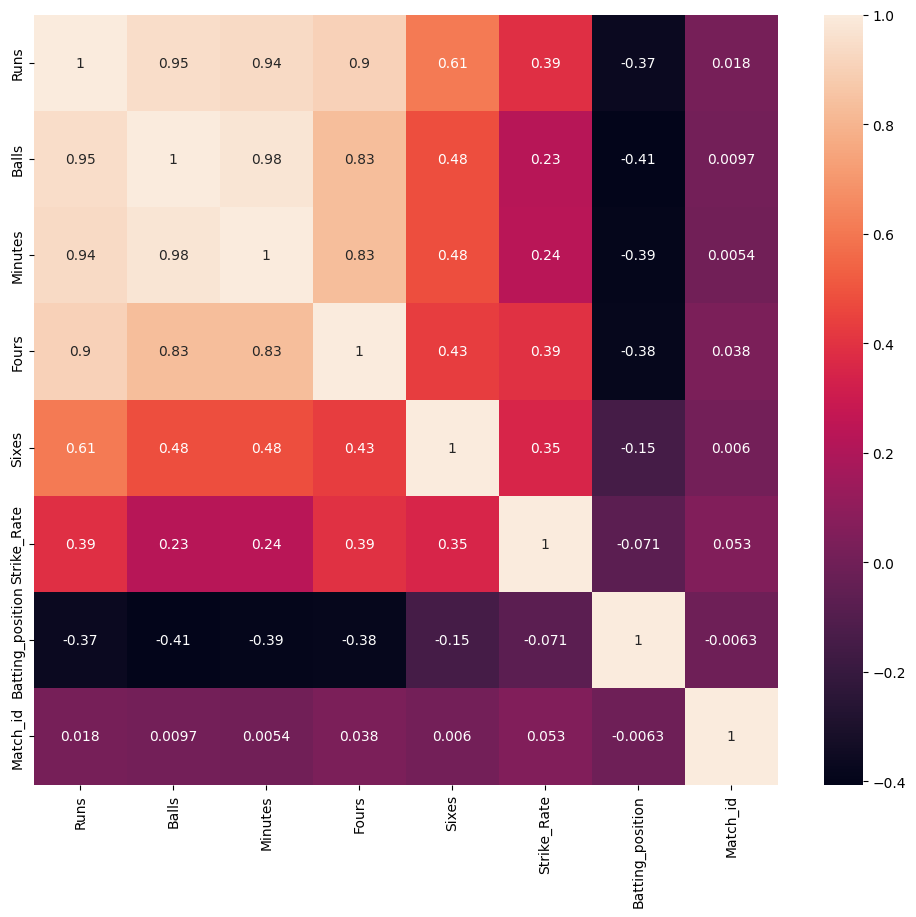

In [ ]:
plt.figure(figsize=(12,10))
corr=batting_data.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
batting_data_updated=batting_data.drop('Minutes', axis=1)

In [ ]:
batting_data_updated

,Name,Description,Runs,Balls,Fours,Sixes,Strike_Rate,Batting_position,Match_id
0,Tamim Iqbal,c â Dhoni b Yadav,25,25,4,0,100.00,1,656485
1,Imrul Kayes,run out (Jadeja/Yadav),5,14,0,0,35.71,2,656485
2,Soumya Sarkar,c Dhoni b Mohammed Shami,29,43,3,1,67.44,3,656485
3,Mahmudullah,c Dhawan b Mohammed Shami,21,31,2,0,67.74,4,656485
4,Shakib Al Hasan,c Mohammed Shami b Jadeja,10,34,0,0,29.41,5,656485
...,...,...,...,...,...,...,...,...,...
920,Taskin Ahmed,c Adair b Hume,11,7,0,1,157.14,8,4539
921,Nasum Ahmed,not out,11,7,2,0,157.14,9,4539
922,Mustafizur Rahman,not out,1,2,0,0,50.00,10,4539
923,Tamim Iqbal (c),not out,41,41,5,2,100.00,1,4547


Imported weather dataset


In [ ]:
batting_weather_dataset=pd.read_csv('/content/drive/MyDrive/Thesis Data set/Weather Dataset/Weather Dataset - Sheet1.csv')
batting_weather_dataset

,Date,Match_id,URL_Text,Batting_Session,Venue,Temp,Feels,Wind,Gust,Rain,Cloud,Pressure
0,19-Mar-15,656485,ODI # 3641,18.45-22.15,Melbourne Cricket Ground,21,25,14,33,0.2,73,1017
1,17-Apr-15,858485,ODI # 3647,14.30-18.00,Shere Bangla National Stadium,34,37,13,23,0.0,46,1005
2,19-Apr-15,858487,ODI # 3648,18.45-22.15,Shere Bangla National Stadium,29,34,13,19,0.0,15,1008
3,22-Apr-15,858489,ODI # 3649,18.45-22.15,Shere Bangla National Stadium,27,31,13,31,2.6,62,1004
4,18-Jun-15,870731,ODI # 3658,15.00-18.30,Shere Bangla National Stadium,32,40,9,12,0.0,21,998
...,...,...,...,...,...,...,...,...,...,...,...,...
101,01-Mar-23,1351397,ODI # 4525,12.00-15.30,Shere Bangla National Stadium,36,35,15,17,0.0,0,1012
102,03-Mar-23,1351398,ODI # 4528,16.15-19.45,Shere Bangla National Stadium,32,30,10,20,0.0,0,1012
103,06-Mar-23,1351399,ODI # 4531,12.00-15.30,Zahur Ahmed Chowdhury Stadium,31,36,14,16,0.0,0,1011
104,18-Mar-23,1355717,ODI # 4539,10.45-14.15,Sylhet International Cricket Stadium,26,27,15,18,0.0,27,1013


In [ ]:
batting_weather_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             106 non-null    object 
 1   Match_id         106 non-null    int64  
 2   URL_Text         106 non-null    object 
 3   Batting_Session  106 non-null    object 
 4   Venue            106 non-null    object 
 5   Temp             106 non-null    int64  
 6   Feels            106 non-null    int64  
 7   Wind             106 non-null    int64  
 8   Gust             106 non-null    int64  
 9   Rain             106 non-null    float64
 10  Cloud            106 non-null    int64  
 11  Pressure         106 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 10.1+ KB


Find coorelation of weather dataset

In [ ]:
batting_weather_dataset.corr()

<ipython-input-32-942ad9f17af2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  batting_weather_dataset.corr()


,Match_id,Temp,Feels,Wind,Gust,Rain,Cloud,Pressure
Match_id,1.000000,0.007626,-0.096931,-0.076872,-0.080622,-0.067600,-0.297146,0.315271
Temp,0.007626,1.000000,0.965183,-0.196079,-0.176123,0.139479,-0.169413,-0.618152
Feels,-0.096931,0.965183,1.000000,-0.209046,-0.159496,0.212258,-0.046994,-0.692988
Wind,-0.076872,-0.196079,-0.209046,1.000000,0.836524,-0.111553,-0.016075,0.088890
Gust,-0.080622,-0.176123,-0.159496,0.836524,1.000000,0.031214,0.094319,0.085726
Rain,-0.067600,0.139479,0.212258,-0.111553,0.031214,1.000000,0.430923,-0.218462
Cloud,-0.297146,-0.169413,-0.046994,-0.016075,0.094319,0.430923,1.000000,-0.186877
Pressure,0.315271,-0.618152,-0.692988,0.088890,0.085726,-0.218462,-0.186877,1.000000


<ipython-input-33-3c81456fcd96>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=batting_weather_dataset.corr()


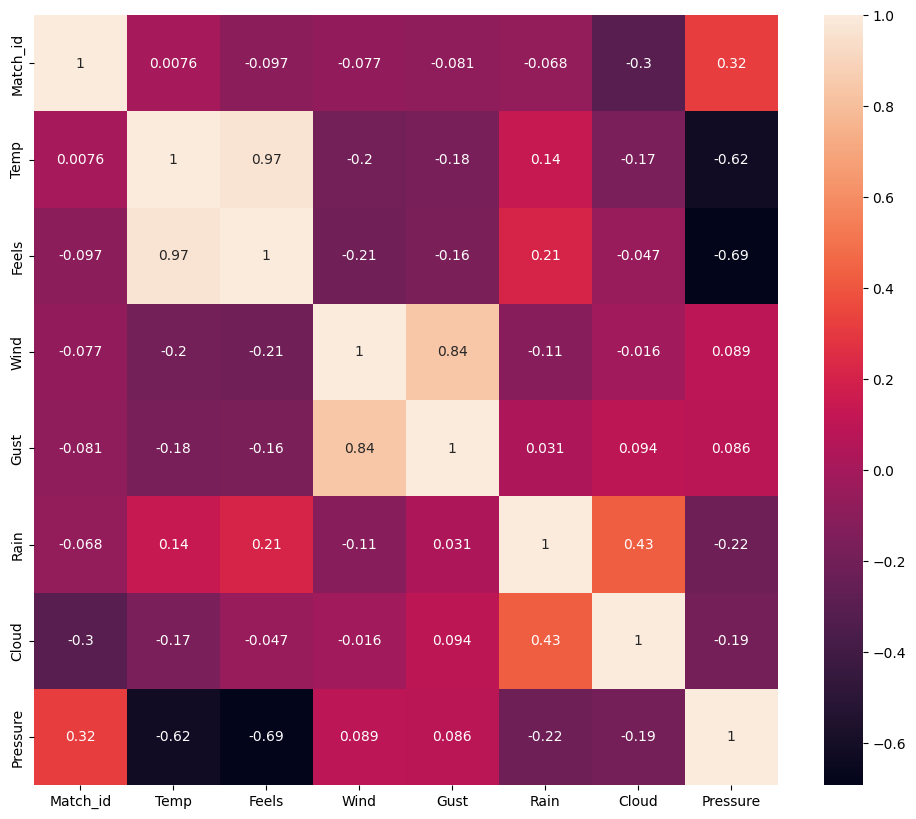

In [ ]:
plt.figure(figsize=(12,10))
corr=batting_weather_dataset.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
batting_weather_dataset_updated=batting_weather_dataset.drop('Feels',axis=1)
weather_dataset_updated=batting_weather_dataset_updated.drop('Gust',axis=1)
batting_weather_dataset_updated

,Date,Match_id,URL_Text,Batting_Session,Venue,Temp,Wind,Gust,Rain,Cloud,Pressure
0,19-Mar-15,656485,ODI # 3641,18.45-22.15,Melbourne Cricket Ground,21,14,33,0.2,73,1017
1,17-Apr-15,858485,ODI # 3647,14.30-18.00,Shere Bangla National Stadium,34,13,23,0.0,46,1005
2,19-Apr-15,858487,ODI # 3648,18.45-22.15,Shere Bangla National Stadium,29,13,19,0.0,15,1008
3,22-Apr-15,858489,ODI # 3649,18.45-22.15,Shere Bangla National Stadium,27,13,31,2.6,62,1004
4,18-Jun-15,870731,ODI # 3658,15.00-18.30,Shere Bangla National Stadium,32,9,12,0.0,21,998
...,...,...,...,...,...,...,...,...,...,...,...
101,01-Mar-23,1351397,ODI # 4525,12.00-15.30,Shere Bangla National Stadium,36,15,17,0.0,0,1012
102,03-Mar-23,1351398,ODI # 4528,16.15-19.45,Shere Bangla National Stadium,32,10,20,0.0,0,1012
103,06-Mar-23,1351399,ODI # 4531,12.00-15.30,Zahur Ahmed Chowdhury Stadium,31,14,16,0.0,0,1011
104,18-Mar-23,1355717,ODI # 4539,10.45-14.15,Sylhet International Cricket Stadium,26,15,18,0.0,27,1013


Imported Bowling Dataset

In [ ]:
bowling_dataset=pd.read_csv('/content/drive/MyDrive/Thesis Data set/Bowling List/Bowling_data.csv')
bowling_dataset

,Name,Overs,Maidens,Runs,Wickets,Econ,Dots,4s,6s,Wd,Nb,Match_Id
0,Mashrafe Mortaza,10.0,0,69,1,6.90,30,10,0,0,1,656485
1,Taskin Ahmed,10.0,0,69,3,6.90,30,9,1,1,0,656485
2,Nasir Hossain,9.0,0,35,0,3.88,28,1,1,1,0,656485
3,Mahmudullah,1.0,0,4,0,4.00,3,0,0,0,0,656485
4,Rubel Hossain,10.0,0,56,1,5.60,25,4,1,1,1,656485
...,...,...,...,...,...,...,...,...,...,...,...,...
651,Hasan Mahmud,8.1,1,32,5,3.91,35,5,0,1,0,1355719
652,Taskin Ahmed,10.0,1,26,3,2.60,45,2,0,1,0,1355719
653,Ebadot Hossain,6.0,0,29,2,4.83,24,3,0,2,0,1355719
654,Nasum Ahmed,3.0,0,11,0,3.66,13,2,0,0,0,1355719


In [ ]:
bowling_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      656 non-null    object 
 1   Overs     656 non-null    float64
 2   Maidens   656 non-null    int64  
 3   Runs      656 non-null    int64  
 4   Wickets   656 non-null    int64  
 5   Econ      656 non-null    float64
 6   Dots      656 non-null    int64  
 7   4s        656 non-null    int64  
 8   6s        656 non-null    int64  
 9   Wd        656 non-null    int64  
 10  Nb        656 non-null    int64  
 11  Match_Id  656 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 61.6+ KB


In [ ]:
bowling_dataset.describe()

,Overs,Maidens,Runs,Wickets,Econ,Dots,4s,6s,Wd,Nb,Match_Id
count,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,6.560000e+02
mean,7.211738,0.257622,37.190549,1.164634,5.385655,22.649390,3.120427,0.690549,0.785061,0.076220,1.135395e+06
std,2.880283,0.589296,17.959547,1.233266,2.105833,10.898236,2.276829,0.913162,1.091741,0.303136,1.432476e+05
min,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.564850e+05
25%,5.150000,0.000000,24.000000,0.000000,4.000000,16.000000,1.000000,0.000000,0.000000,0.000000,1.051297e+06
50%,8.000000,0.000000,36.500000,1.000000,5.120000,24.000000,3.000000,0.000000,0.000000,0.000000,1.153249e+06
75%,10.000000,0.000000,49.000000,2.000000,6.330000,30.000000,4.000000,1.000000,1.000000,0.000000,1.244023e+06
max,10.000000,4.000000,93.000000,6.000000,24.000000,48.000000,12.000000,5.000000,6.000000,2.000000,1.355719e+06


In [ ]:
bowling_dataset.corr()

In [ ]:
plt.figure(figsize=(12,10))
corr=bowling_dataset.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
plt.figure(figsize=(12,10))
corr=bowling_dataset.corr()
sns.heatmap(corr,annot=True)
plt.show()